MoviePy - Building file cubic.gif with imageio.


t:   4%|██▊                                                                  | 4/100 [00:18<07:53,  4.93s/it, now=None]

KeyboardInterrupt: 

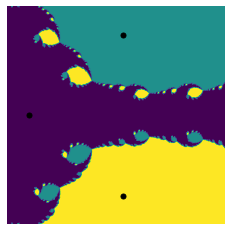

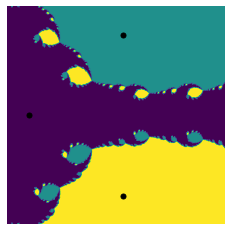

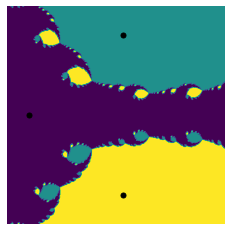

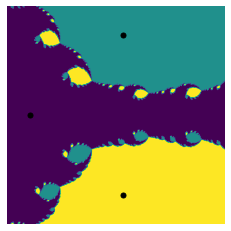

In [1]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

PARAMS = {
    "xlim": (-1.5, 1.5),
    "ylim": (-1.5, 1.5),
    "niter": 100,  # number of Newton iterations
    "res": 700,  # points per axis
    "duration": 5,  # gif duration in seconds
}


def calc_newton_fractal(C: np.ndarray, poly: Polynomial, niter=100) -> np.ndarray:
    """Calculate a Newton fractal for a given polynomial and complex grid."""

    # Perform newton iterations on grid points.
    for _ in range(niter):
        C = C - poly(C) / poly.deriv()(C)

    # Order grid points by proximity to roots.
    root_proximity = np.array([np.abs(C - root) for root in poly.roots()])
    fractal = np.argmin(root_proximity, axis=0)

    return fractal


def plot_fractal(
    fractal: np.ndarray, roots: list, xlim: tuple, ylim: tuple
) -> plt.Figure:
    """Plot a single Euler fractal."""

    fig = plt.figure(figsize=(4, 4))
    plt.imshow(
        fractal.T, extent=(*xlim, *ylim), cmap="viridis", interpolation="bilinear"
    )
    root_x = [x.real for x in roots]
    root_y = [x.imag for x in roots]
    plt.plot(root_x, root_y, ".k", ms=10)
    plt.axis("off")

    return fig


def make_gif(filename, iter_func, duration, fps=20):
    """Make an animated gif from an interation function."""

    def make_frame(t):
        fig = iter_func(t / duration)
        img = mplfig_to_npimage(fig)
        plt.close(fig)
        return img

    animation = VideoClip(make_frame, duration=duration)
    animation.write_gif(filename, fps=fps)


def animate_newton_fractal(
    origin: list,
    dest: list,
    filename: str,
    duration=5,
    res=500,
    niter=100,
    xlim=(-1.5, 1.5),
    ylim=(-1.5, 1.5),
):
    """Make an animated gif of a Newton fractal given two polynomials."""
    origin, dest = np.array(origin), np.array(dest)
    x = np.linspace(*xlim, res)
    y = np.linspace(*ylim, res)
    c = x[:, np.newaxis] + 1j * y[np.newaxis, :]

    def iter_func(t):
        coefs = t * origin + (1 - t) * dest
        poly = Polynomial(coefs)

        fractal = calc_newton_fractal(c, poly, niter=niter)
        fig = plot_fractal(fractal, poly.roots(), xlim, ylim)
        return fig

    make_gif(filename, iter_func, duration)


if __name__ == "__main__":

    animate_newton_fractal(
        [-1, 1, 1, 1], [1.5, 1, 1, 1], "cubic.gif", **PARAMS,
    )
#     animate_newton_fractal(
#         [-1, 1, 1, 1, 1, 1], [1.5, 1, 1, 1, 1, 1], "quintic.gif", **PARAMS,
#     )
#     animate_newton_fractal(
#         [-1, 1, 1, 1, 1, 1, 1, 1], [1.5, 1, 1, 1, 1, 1, 1, 1], "septic.gif", **PARAMS,
#     )
#     animate_newton_fractal(
#         [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#         [1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1],
#         "nonic.gif",
#         **PARAMS,
#     )